Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

This homework will require the use of a few datasets in a package written by the TA, Dan. Before beginning, please be sure to download and install the package. Example code for doing this is below:

In [1]:
# Un-comment the line below to install the package by deleting the # symbol
getwd()
#setwd(dir)
install.packages("C:/Users/Katie/Documents/R/win-library/3.4/AMSdata_0.1.0.tar.gz",repos = NULL, type = "source") # Change the first character string to the path of the source package 

library(AMSdata)
#untar("C:/Users/Katie/Downloads/AMSdata_0.1.0.tar.gz")
#library(AMSdata)

[1] "C:/Users/Katie/Downloads"

Installing package into 'C:/Users/Katie/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


The `election_2016` dataset contains county-level information about the porportion of votes received in the presidential primaries for each candidate in 2016. Begin by subsetting the data to just the information concerning then-candidate Donald Trump. Name this subsetted data set `trump_2016`.

In [2]:
#load(file = "C:/Users/Katie/Documents/R/win-library/3.4/AMSdata/data/election_2016.rda")
data(election_2016)
head(election_2016)
trump_2016 = subset(election_2016, candidate == "Donald Trump")
head(trump_2016)

state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
Alabama,AL,Autauga,1001,Democrat,Bernie Sanders,544,0.182
Alabama,AL,Autauga,1001,Democrat,Hillary Clinton,2387,0.800
Alabama,AL,Baldwin,1003,Democrat,Bernie Sanders,2694,0.329
Alabama,AL,Baldwin,1003,Democrat,Hillary Clinton,5290,0.647
Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078
Alabama,AL,Barbour,1005,Democrat,Hillary Clinton,2567,0.906


,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
136,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
141,Alabama,AL,Baldwin,1003,Republican,Donald Trump,23618,0.469
146,Alabama,AL,Barbour,1005,Republican,Donald Trump,1710,0.501
151,Alabama,AL,Bibb,1007,Republican,Donald Trump,1959,0.494
156,Alabama,AL,Blount,1009,Republican,Donald Trump,7390,0.487
161,Alabama,AL,Bullock,1011,Republican,Donald Trump,313,0.565


Now quickly check to make sure the subset was done correctly before moving on.

In [3]:
stopifnot(round(mean(trump_2016$votes),digits=6) == 3709.576408)

Create a chloropleth map that shows the porportion of registered Republican voters that voted for Trump in each county. The variable from the `trump_2016` data set that you should use is `fraction_votes`. Use the `cut` function to create seven interval groups: 0% - 15%, 15% - 30%, 30% - 45%, 45% - 60%, 60% - 75%, 75% - 90%, and above 90%. This will be necessary when creating the color buckets for plotting. Remember to include all of the necessary plot elements like a title, legend, context information, etc.

Installing package into 'C:/Users/Katie/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'mapproj' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Katie\AppData\Local\Temp\RtmpWSLR4p\downloaded_packages


Loading required package: RColorBrewer


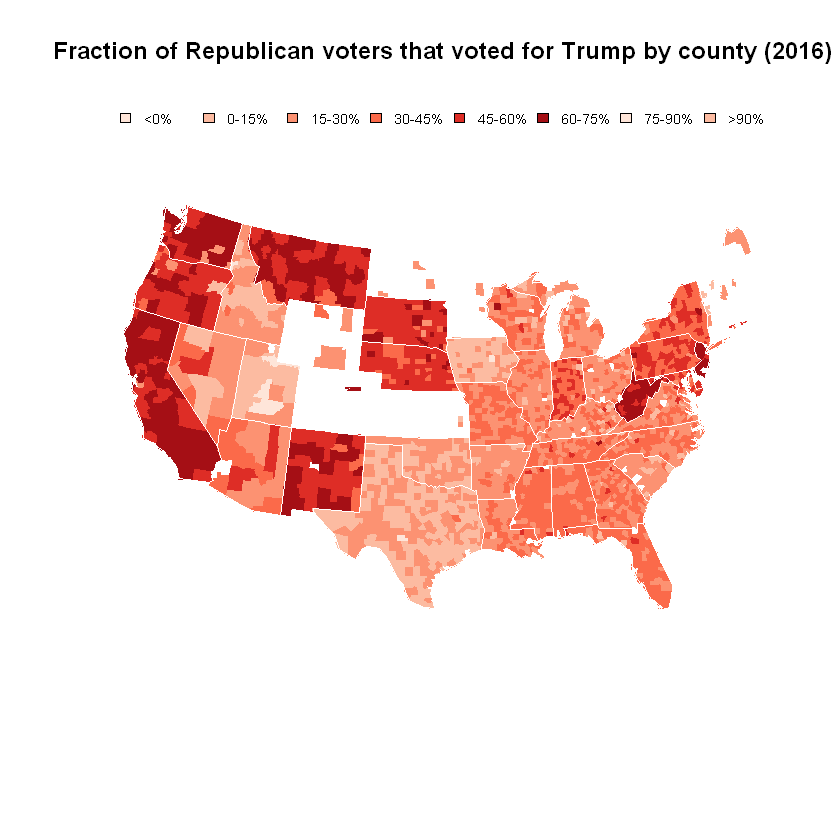

In [4]:
# YOUR CODE HERE
# Define color buckets
library(maps)
#map("usa", col="darkgrey")
install.packages("mapproj", repos = "http://cran.us.r-project.org")


if (!require("RColorBrewer")) {
install.packages("RColorBrewer")
library(RColorBrewer)
}
#display.brewer.all()

colors = brewer.pal(6, "Reds")

trump_2016$colorBuckets <- as.numeric(cut(trump_2016$fraction_votes, c(0, .15,
.30, .45, .60, .75, .90)))


leg.txt <- c("<0%", "0-15%", "15-30%", "30-45%", "45-60%", "60-75%", "75-90%",">90%")
# Align data with map definitions by matching FIPS codes
# Works much better than trying to match the state,county names
# Which also include multiple polygons for some counties

data(county.fips)

colorsmatched <- trump_2016$colorBuckets[match(county.fips$fips, trump_2016$fips)]
# Draw map
map("county", col = colors[colorsmatched], fill = TRUE,
resolution = 0, lty = 0, projection = "polyconic")

map("state", col = "white", fill = FALSE, add = TRUE, lty
= 1, lwd = 0.2, projection="polyconic")

title("Fraction of Republican voters that voted for Trump by county (2016)")
legend("top", leg.txt, horiz = TRUE, fill = colors,
bty="n", cex = 0.7 )


---

# Problem 2

Next, the `air_qual` data set includes information on the median levels of the pollutant measure PM2.5 at 142 outdoor monitoring stations in California in 2017. Use these data to create an isopleth map of the median PM2.5 levels in 2017. Include all necessary plot elements.

AQS_SITE_ID,STATE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,pm2.5
60010007,California,Alameda,37.68753,-121.7842,5.7
60010009,California,Alameda,37.74307,-122.1699,6.6
60010011,California,Alameda,37.81478,-122.2823,10.1
60010012,California,Alameda,37.79362,-122.2634,7.5
60010013,California,Alameda,37.86477,-122.3027,6.0
60070008,California,Butte,39.76154,-121.8416,5.2


Installing package into 'C:/Users/Katie/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'akima' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Katie\AppData\Local\Temp\RtmpWSLR4p\downloaded_packages


Warning message:
"package 'akima' was built under R version 3.4.2"

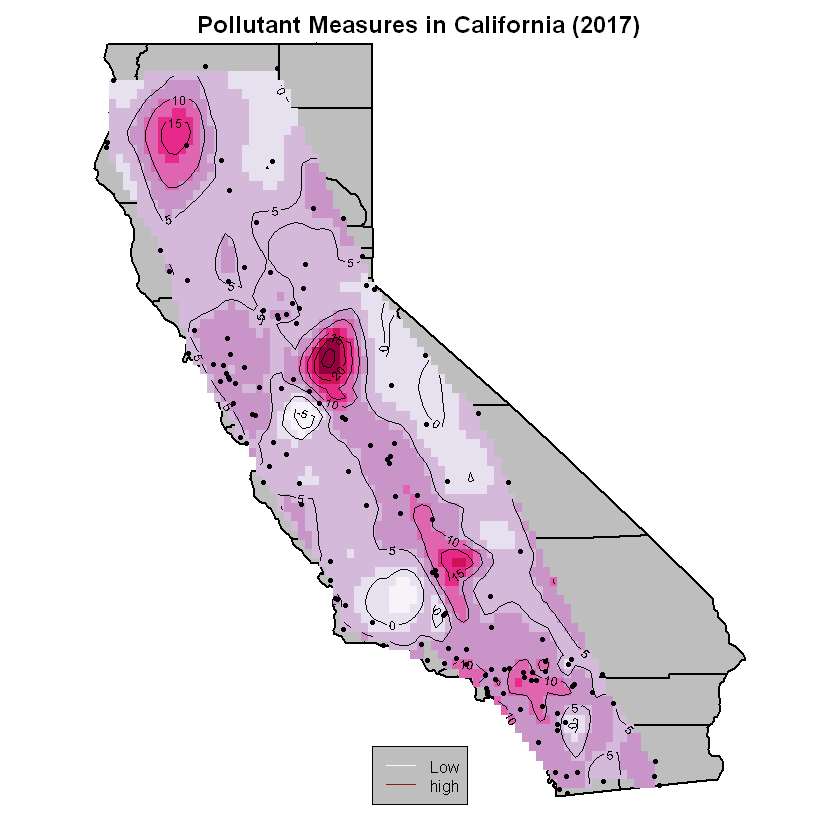

In [5]:
data("air_qual")
head(air_qual)
#map("county", region="california", interior=F, col="darkgrey")
#map("county", region="california", boundary=F, lty=2, add=T, col="darkgrey")
install.packages("akima", repos = "http://cran.us.r-project.org")
library(akima)

colorscale = brewer.pal(8, "PuRd")

#display.brewer.all()

windows()

map("county", region="california", #xlim=c(-74,-71), ylim=c(38.2, 41.5)
    lwd=2, fill=T, col="grey",
boundary=FALSE, mar=c(1,1,1,1))

pm25.int = interp(x=air_qual$SITE_LONGITUDE, y=air_qual$SITE_LATITUDE, z=air_qual$pm2.5,
xo=seq(min(air_qual$SITE_LONGITUDE), max(air_qual$SITE_LONGITUDE), length = 80),
yo=seq(min(air_qual$SITE_LATITUDE), max(air_qual$SITE_LATITUDE), length = 80), linear = F)
image(pm25.int, col=colorscale, axes=F, add=T)
contour(pm25.int, add=T, col="black")
points(air_qual$SITE_LONGITUDE, air_qual$SITE_LATITUDE, cex=0.75, pch=20)



title("Pollutant Measures in California (2017)")
legend("bottom", legend=c("Low", "high"),
       col=c("ghostwhite", "firebrick4"), bg = "gray", lty=1:1, cex=0.8)


---

# Problem 3

The `lesson_8` data set contains mostly-cleaned text data from the lecture 8 slides. Use this information to produce two plots: a word cloud of the most common words used in the lecture, and a bar plot of the 8 most common words. In order to prevent too many words from appearing in the word cloud, set the minimum number of occurrances for each word to be 5. Include plot elements on the bar plot, but exclude the title, labels, and context information on the word cloud, as including it may be confusing.

[1] "character"

,0000,0005,0010,0015,0020,0025,0030,0080,0081,0088,...,ylimc382,york,yoseqminscallopstilat,you,ypointestimateford,yscallopstilat,zealand,zelig,zero,zscallopstilgcatch
1,2,2,2,2,2,2,2,40,10,192,...,1,3,1,9,1,1,1,2,2,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


word,freq
1,8683
2,2
3,1


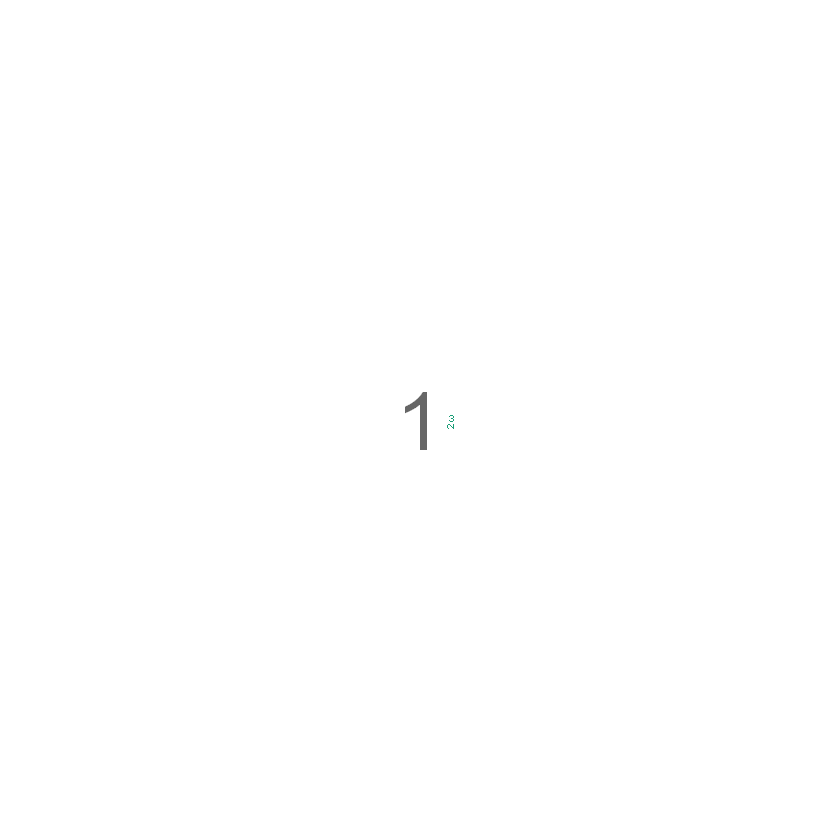

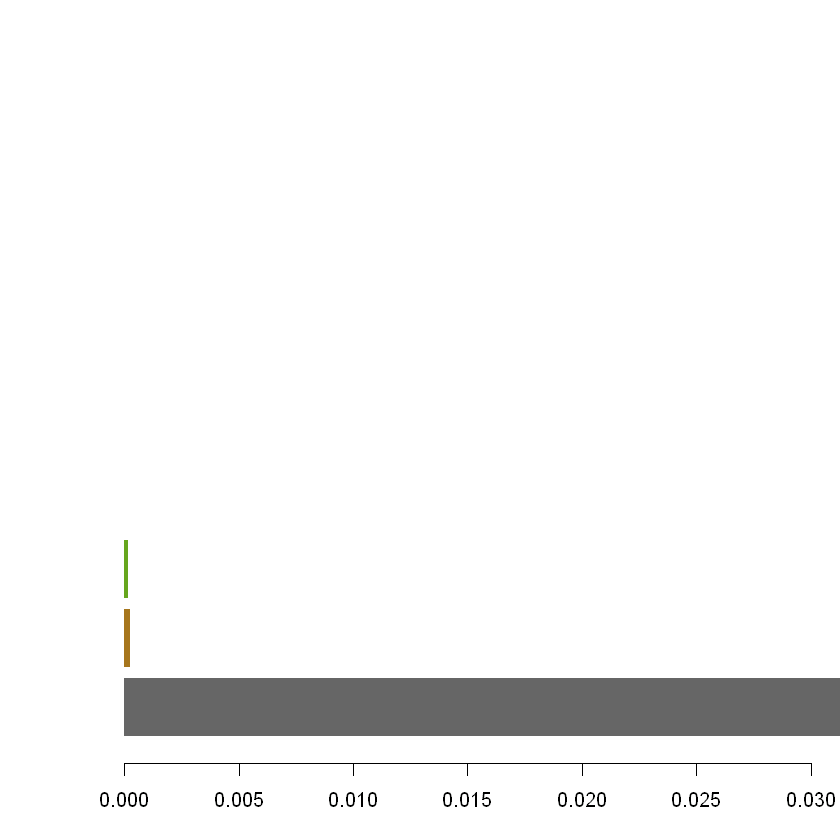

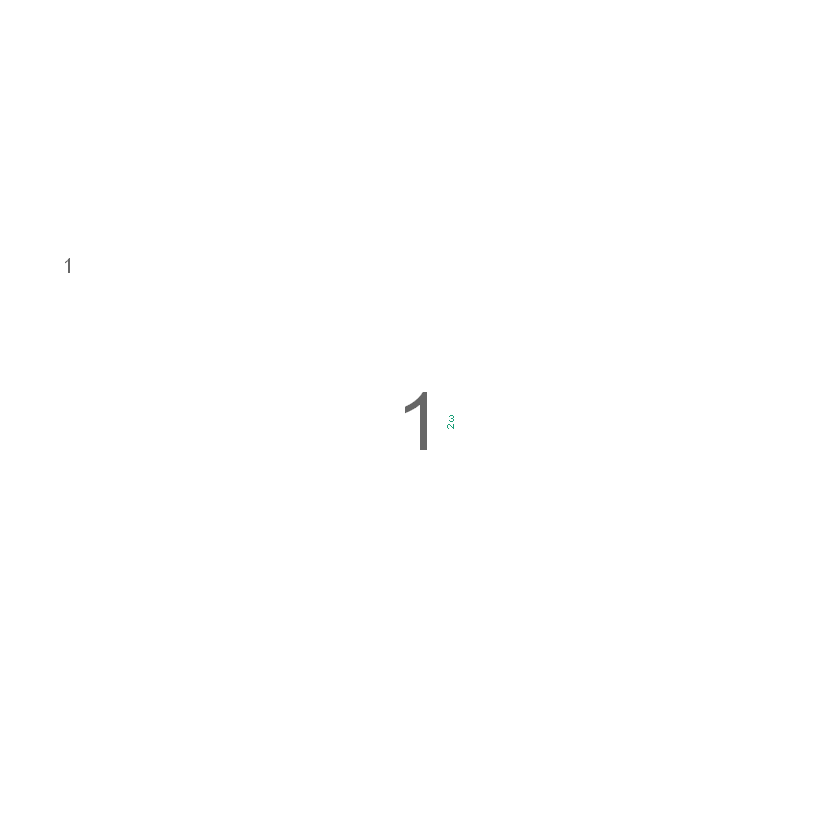

In [23]:
data("lesson_8")
class(lesson_8)
#head(lesson_8)
if (!require("XML")) {
install.packages("XML", repos = "http://cran.us.r-project.org")
library(XML)
}
#install.packages("SnowballC", repos = "http://cran.us.r-project.org")
library(SnowballC)
#install.packages("tm", repos = "http://cran.us.r-project.org")
library(tm)
#install.packages("wordcloud", repos = "http://cran.us.r-project.org")
library(wordcloud)
if (!require("RColorBrewer")) {
#install.packages("RColorBrewer")
library(RColorBrewer)
}


t = lesson_8
#head(t)
ap.corpus = Corpus(VectorSource(t))
ap.corpus = tm_map(ap.corpus, content_transformer(tolower))
ap.corpus = tm_map(ap.corpus, removePunctuation)
ap.corpus = tm_map(ap.corpus, PlainTextDocument)
#ap.corpus = tm_map(ap.corpus, removeWords, stopwords("english"))
ap.corpus <- tm_map(ap.corpus, stemDocument) 


ap.corpus <- Corpus(VectorSource(ap.corpus)) # change class 
matrix_term <- DocumentTermMatrix(ap.corpus)


ap.m = as.matrix(matrix_term)
ap.m
ap.v = sort(rowSums(ap.m),decreasing=TRUE)
ap.d = data.frame(word = names(ap.v),freq=ap.v)
head(ap.d,10)
pal2 = brewer.pal(8,"Dark2")


wordcloud(words = ap.d$word, freq = ap.d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))


kk = 10
ord = order(ap.d$freq, decreasing=T)
pal2 = brewer.pal(8,"Dark2")
colscale = c(pal2[8], pal2[7],
pal2[5], rep(pal2[4],2),
rep(pal2[3],5))

windows()
par(mar=c(3,5,1,1)+0.2)
barplot(height=round(ap.d$freq[ord[1
:kk]]/sum(ap.d$freq), 4),
names.arg=NULL, horiz=T, las=1,
xlim=c(0,0.03), col=colscale,
border=colscale)

mtext(side = 2, line = 1, text = ap.d$word[ord[1:kk]], at =
seq(0.7,length=10,by=1.2), las=2,
col=colscale)   

---

# Problem 4

The `new_quakes` data set includes data on earthquakes that registered over a magnitude of 4.5 between October 23, 2017 and November 23, 2017 all over the world. Use this data frame to make a point process map in which the color of each point describes its magnitude. Be sure to include a title, legend, and context information!

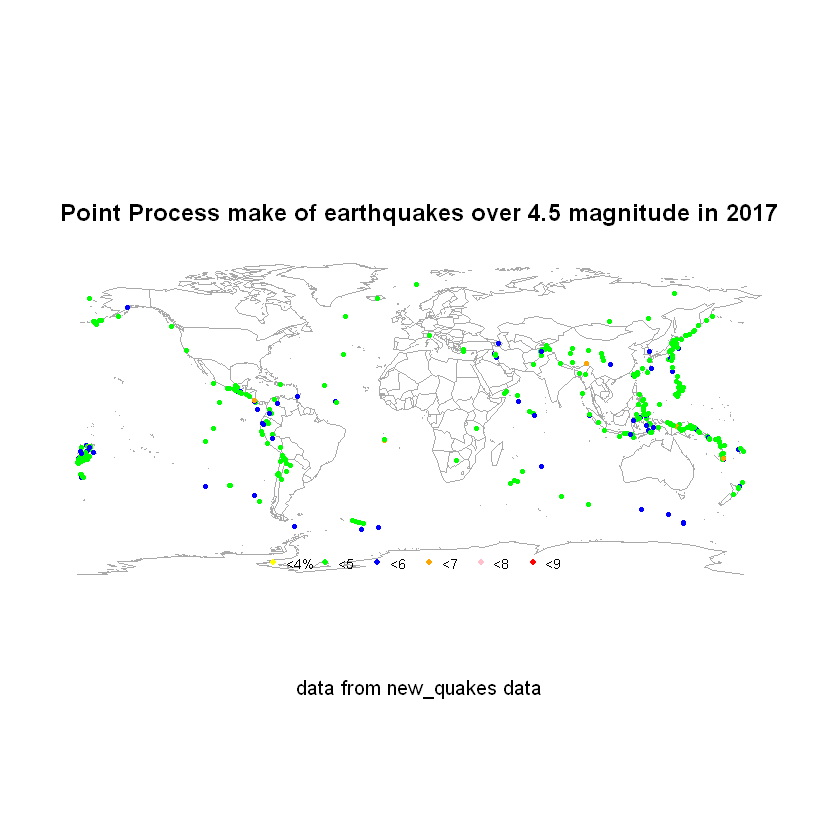

In [65]:
library(AMSdata)
data("new_quakes")
#head(new_quakes)

###points process
quakes = data.frame(new_quakes)
#head(quakes)

colors = brewer.pal(6, "Reds")

quakes$colors <- as.numeric(cut(quakes$mag, c(0, 4,
5, 6, 7, 8, 9)))

#points(mappts,col=mappts$z,pch=19)

map(col="darkgrey")
palette(c("yellow","green", "blue","orange","pink", "red" ))
points(quakes$longitude, quakes$latitude, col = quakes$colors, cex=0.75, pch=20)
#points(quakes[,3], quakes[ ,2], pch=20, cex=0.5)
title(main = "Point Process make of earthquakes over 4.5 magnitude in 2017", sub = "data from new_quakes data")

leg.txt <- c("<4%", "<5", "<6", "<7", "<8", "<9")

legend("bottom", leg.txt, horiz = TRUE, col=c("yellow","green", "blue","orange","pink", "red" ),bty="n", cex=.7, pch = 16)

